# Notebook for Checking VOI LUT transform

This notebook has been written by Cesar Augusto Sanchez to check the VOI LUT transform from the pydicom library, which apparently could solve some of the issues related to the processing of the images. The notebook is mainly exploratory and to understand what has been done with this dataset. 

Therefore, there is a first question: what is the VOI LUT transform? 

## VOI LUT transform

(source: https://radiologykey.com/image-processing-and-display/)

### LUT
" Following histogram analysis, lookup tables provide a method of altering the image to change the display of the digital image in various ways. Because digital Image Receptors (IRs) have a linear exposure response and a very large dynamic range, raw data images exhibit low contrast and must be altered to improve visibility of anatomic structures. Lookup tables provide the means to alter the brightness and grayscale of the digital image using computer algorithms. They are also sometimes used to reverse or invert image grayscale. Figure 7-3 visually compares pixel values of the original image with a processed image. If the image is not altered, the graph would be a straight line. If the original image is altered, the original pixel values would be different in the processed image and the graph would no longer be a straight line but might resemble a characteristic curve for radiographic film (Figure 7-4)." 

Look-up Table == LUT

Value of Interest (VOI) (source: https://www.aapm.org/meetings/amos2/pdf/29-7999-58461-92.pdf)


## Checking with Pydicom

In [66]:
import sys
sys.path.insert(1, '/path/to/file/')

In [1]:

import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut


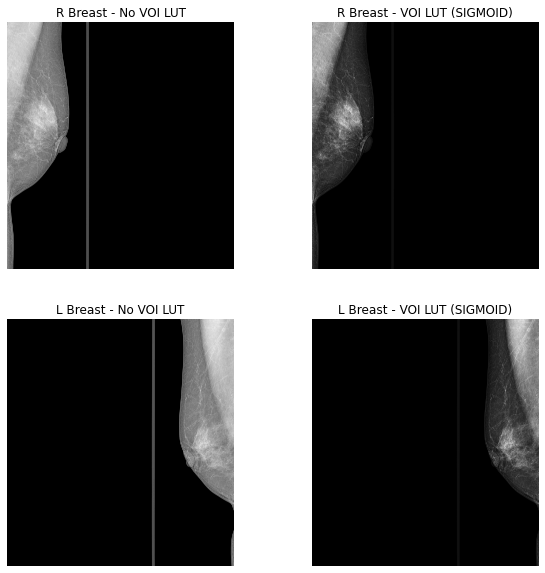

In [5]:
path = '../data/train_images/10006/'
images = sorted(os.listdir('../data/train_images/10006/'))

# Perform the VOI LUT transformation to the example image
def load_image_pydicom(img_path, voi_lut=True):
    # Code made with help from https://www.kaggle.com/code/raddar/convert-dicom-to-np-array-the-correct-way
    # and https://www.kaggle.com/code/bobdegraaf/dicomsdl-voi-lut
    dicom = pydicom.dcmread(img_path)
    img = dicom.pixel_array
    if voi_lut:
        img = apply_voi_lut(img, dicom)
    if dicom.PhotometricInterpretation == "MONOCHROME1":
        # The image is inverted when MONOCHROME1 is True. 
        img = np.max(img) - img
    # Normalize the image. First we need to subtract the minimum, then divide by the maximum and,
    # finally, multiply by 255 to get the image in the range 0-255. Set it to be uint8 to save memory.
    img = img - np.min(img)
    img = img / np.max(img)
    img = (img * 255).astype(np.uint8)
    return img


plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
im1 = load_image_pydicom(path+images[0], voi_lut=False)
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.title('R Breast - No VOI LUT')
plt.subplot(2,2,2)
im2 = load_image_pydicom(path+images[0], voi_lut=True)
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.title('R Breast - VOI LUT (SIGMOID)')
plt.subplot(2,2,3)
im3 = load_image_pydicom(path+images[1], voi_lut=False)
plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.title('L Breast - No VOI LUT')
plt.subplot(2,2,4)
im4 = load_image_pydicom(path+images[1], voi_lut=True)
plt.imshow(im4, cmap='gray')
plt.axis('off')
plt.title('L Breast - VOI LUT (SIGMOID)')
plt.show()


Note that the images have high contrast compared to the original. Therefore, we might want to use them like this.